# **Analysis of 3 months of data**
Data spans from January 1st 2021 until March 31st 2021.
Information we want from this analysis:
- What time do we activate the detector for the first time of the day?
- How much time do we spend in the kitchen per day?
For both questions, the goal is to provide the mean, standard deviation and a graph that shows the first time over the days and outlines the mean +/- 1 standard deviation

## **Get the dataframe ready for analysis**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data3months.csv", sep = '\t')

In [3]:
df.head()

,Date,Equipment,Type,Value,Unit
0,2021-01-01 00:00:00,5MultiSensor 6 (ZW100),HUMIDITY,"38,000000000",%
1,2021-01-01 01:00:00,5MultiSensor 6 (ZW100),HUMIDITY,"36,500000000",%
2,2021-01-01 02:00:00,5MultiSensor 6 (ZW100),HUMIDITY,"35,500000000",%
3,2021-01-01 03:00:00,5MultiSensor 6 (ZW100),HUMIDITY,"35,000000000",%
4,2021-01-01 03:15:00,5MultiSensor 6 (ZW100),HUMIDITY,"35,000000000",%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15050 entries, 0 to 15049
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15050 non-null  object
 1   Equipment  15050 non-null  object
 2   Type       15050 non-null  object
 3   Value      15050 non-null  object
 4   Unit       6582 non-null   object
dtypes: object(5)
memory usage: 588.0+ KB


In [5]:
df['Unit'].value_counts(dropna = False)

NaN    8468
%      2194
°C     2194
Lux    2194
Name: Unit, dtype: int64

## **Replace decimal marker**
In France, the decimal marker is a comma --> Need to change to a dot.

In [6]:
df["Value"].head()

0    38,000000000
1    36,500000000
2    35,500000000
3    35,000000000
4    35,000000000
Name: Value, dtype: object

In [7]:
df["Value"] = df["Value"].str.replace(',','.')

In [8]:
df["Value"].head()

0    38.000000000
1    36.500000000
2    35.500000000
3    35.000000000
4    35.000000000
Name: Value, dtype: object

## **Convert data type from object to float**
The **Value** column contains data we want to analyze but the data is an object. Only if the data is considered as floats or integers can these data be analyzed.

In [9]:
df["Value"] = df['Value'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15050 entries, 0 to 15049
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15050 non-null  object 
 1   Equipment  15050 non-null  object 
 2   Type       15050 non-null  object 
 3   Value      15050 non-null  float64
 4   Unit       6582 non-null   object 
dtypes: float64(1), object(4)
memory usage: 588.0+ KB


## **Remove the columns we don't need**
The Column **Equipment** is not useful for our analysis --> Remove it to simplify our work.

In [11]:
df.head()

,Date,Equipment,Type,Value,Unit
0,2021-01-01 00:00:00,5MultiSensor 6 (ZW100),HUMIDITY,38.0,%
1,2021-01-01 01:00:00,5MultiSensor 6 (ZW100),HUMIDITY,36.5,%
2,2021-01-01 02:00:00,5MultiSensor 6 (ZW100),HUMIDITY,35.5,%
3,2021-01-01 03:00:00,5MultiSensor 6 (ZW100),HUMIDITY,35.0,%
4,2021-01-01 03:15:00,5MultiSensor 6 (ZW100),HUMIDITY,35.0,%


In [12]:
df['Equipment'].value_counts(dropna = False)

5MultiSensor 6 (ZW100)    15050
Name: Equipment, dtype: int64

In [13]:
df = df.drop(["Equipment"], axis = 'columns')

In [14]:
df.head()

,Date,Type,Value,Unit
0,2021-01-01 00:00:00,HUMIDITY,38.0,%
1,2021-01-01 01:00:00,HUMIDITY,36.5,%
2,2021-01-01 02:00:00,HUMIDITY,35.5,%
3,2021-01-01 03:00:00,HUMIDITY,35.0,%
4,2021-01-01 03:15:00,HUMIDITY,35.0,%


## **Rename column heads**

In [15]:
df = df.rename(columns={"Type": "Parameter"})

In [16]:
df.head()

,Date,Parameter,Value,Unit
0,2021-01-01 00:00:00,HUMIDITY,38.0,%
1,2021-01-01 01:00:00,HUMIDITY,36.5,%
2,2021-01-01 02:00:00,HUMIDITY,35.5,%
3,2021-01-01 03:00:00,HUMIDITY,35.0,%
4,2021-01-01 03:15:00,HUMIDITY,35.0,%


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15050 entries, 0 to 15049
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15050 non-null  object 
 1   Parameter  15050 non-null  object 
 2   Value      15050 non-null  float64
 3   Unit       6582 non-null   object 
dtypes: float64(1), object(3)
memory usage: 470.4+ KB


## **Convert the Date into a Datetime stamp**

In [18]:
df["Date"] = pd.to_datetime(df["Date"], format= '%Y-%m-%d %H:%M:%S')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15050 entries, 0 to 15049
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15050 non-null  datetime64[ns]
 1   Parameter  15050 non-null  object        
 2   Value      15050 non-null  float64       
 3   Unit       6582 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 470.4+ KB


## **Select rows where type is PRESENCE**

In [20]:
presence = df.loc[df["Parameter"] == "PRESENCE"]

In [21]:
presence

,Date,Parameter,Value,Unit
4388,2021-01-01 05:47:02,PRESENCE,1.0,NaN
4389,2021-01-01 05:58:08,PRESENCE,0.0,NaN
4390,2021-01-01 06:01:02,PRESENCE,1.0,NaN
4391,2021-01-01 06:05:32,PRESENCE,0.0,NaN
4392,2021-01-01 07:45:49,PRESENCE,1.0,NaN
...,...,...,...,...
10521,2021-03-31 18:52:24,PRESENCE,0.0,NaN
10522,2021-03-31 19:55:17,PRESENCE,1.0,NaN
10523,2021-03-31 20:24:05,PRESENCE,0.0,NaN
10524,2021-03-31 20:26:29,PRESENCE,1.0,NaN


In [22]:
presence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6138 entries, 4388 to 10525
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6138 non-null   datetime64[ns]
 1   Parameter  6138 non-null   object        
 2   Value      6138 non-null   float64       
 3   Unit       0 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 239.8+ KB


## **Select rows where PRESENCE == 1 for the 1st time of the day**

In [23]:
#Extract the date from the top row of the dataframe "presence"
#normalize() changes the time to midnight
start_date = presence['Date'][presence.index.min()].normalize()

#Extract the date from the bottom row of the dataframe "presence"
last_date = presence['Date'][presence.index.max()]

#Create an empty DataFrame called first_time
first_time = pd.DataFrame()

while start_date < last_date:
    #select_start is a selection of the DataFrame "presence"
    select_start = presence[(presence['Date'] >= start_date)]
    #Select the 1st row from the DataFrame "select_start"
    top_row = select_start.iloc[0,]
    #If we are at home:
    if top_row['Date'].normalize() == start_date:
        #Add top_row to the DataFrame "first_time"
        first_time = first_time.append(top_row)
        #Moves the start_date forward 1 day
        start_date = start_date + pd.Timedelta(days = 1)
    #If we are not at home:
    else:
        days_away = top_row['Date'].normalize() - start_date + pd.Timedelta(days = 1)
        start_date = start_date + pd.Timedelta(days = days_away/ pd.Timedelta(days = 1))
first_time

,Date,Parameter,Unit,Value
4388,2021-01-01 05:47:02,PRESENCE,NaN,1.0
4452,2021-01-02 05:12:54,PRESENCE,NaN,1.0
4526,2021-01-03 05:38:04,PRESENCE,NaN,1.0
4620,2021-01-04 05:19:17,PRESENCE,NaN,1.0
4696,2021-01-05 05:04:26,PRESENCE,NaN,1.0
...,...,...,...,...
10156,2021-03-27 06:19:19,PRESENCE,NaN,1.0
10228,2021-03-28 09:00:51,PRESENCE,NaN,1.0
10306,2021-03-29 05:35:49,PRESENCE,NaN,1.0
10406,2021-03-30 04:02:20,PRESENCE,NaN,1.0


In [24]:
first_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 4388 to 10466
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       90 non-null     datetime64[ns]
 1   Parameter  90 non-null     object        
 2   Unit       0 non-null      float64       
 3   Value      90 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.5+ KB


## **Calculate the mean and standard deviation for the time**

Create a new column with time only:
1. Create a Series with the wanted values (time_only)
2. Add this Series to first_time

In [25]:
time_only = pd.Series([(x-x.normalize()) for x in first_time['Date']], index = first_time.index)
time_only

4388    0 days 05:47:02
4452    0 days 05:12:54
4526    0 days 05:38:04
4620    0 days 05:19:17
4696    0 days 05:04:26
              ...      
10156   0 days 06:19:19
10228   0 days 09:00:51
10306   0 days 05:35:49
10406   0 days 04:02:20
10466   0 days 09:28:52
Length: 90, dtype: timedelta64[ns]

In [26]:
first_time['Time'] = time_only

In [27]:
first_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 4388 to 10466
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       90 non-null     datetime64[ns] 
 1   Parameter  90 non-null     object         
 2   Unit       0 non-null      float64        
 3   Value      90 non-null     float64        
 4   Time       90 non-null     timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), object(1), timedelta64[ns](1)
memory usage: 4.2+ KB


In [28]:
first_time_mean = first_time['Time'].mean()
first_time_mean

Timedelta('0 days 05:16:12.755555555')

In [29]:
first_time_std = first_time['Time'].std()
first_time_std

Timedelta('0 days 01:28:59.013996650')

In [72]:
pd.Timedelta(hours = 1/3600)

Timedelta('0 days 00:00:01')

## **Plot first time over days**

In [35]:
#Problem with:
#first_time.plot(x = "Date", y = "Time", legend = False, figsize = (10,7))
#Y-axis does not show time

Convert `first_time_mean` and `first_time_std` into seconds.

Note: `pd.Timedelta(hours = 1/3600)` is `Timedelta('0 days 00:00:01')`

In [44]:
first_time_mean_sec = first_time_mean/pd.Timedelta(hours = 1/3600)
first_time_std_sec = first_time_std/pd.Timedelta(hours = 1/3600)

Convert `first_time_mean_sec` and `first_time_std_sec` into a float

In [48]:
first_time_mean_float = first_time_mean_sec/3600
first_time_std_float = first_time_std_sec/3600

Convert elements in `first_time['Time']` into a float that we can plot

In [49]:
first_time['Time_float'] = (first_time['Time']/pd.Timedelta(hours = 1/3600))/3600

In [50]:
first_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 4388 to 10466
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Date        90 non-null     datetime64[ns] 
 1   Parameter   90 non-null     object         
 2   Unit        0 non-null      float64        
 3   Value       90 non-null     float64        
 4   Time        90 non-null     timedelta64[ns]
 5   Time_int    90 non-null     float64        
 6   Time_float  90 non-null     float64        
dtypes: datetime64[ns](1), float64(4), object(1), timedelta64[ns](1)
memory usage: 5.6+ KB


Get mean +/- 1 standard deviation for plotting

In [55]:
first_time_mean_plus = first_time_mean_float + first_time_std_float
first_time_mean_minus = first_time_mean_float - first_time_std_float

Text(0.5, 0, 'Day')

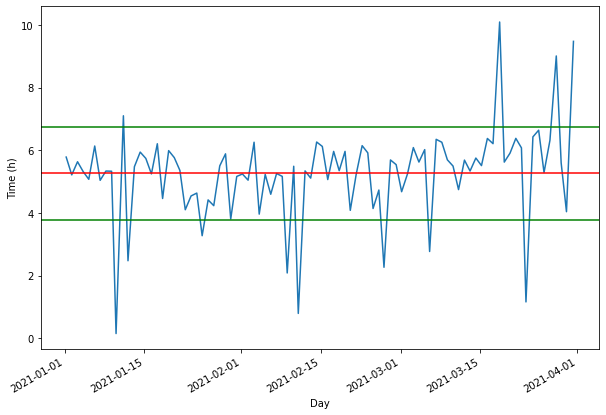

In [56]:
a = first_time.plot(x = "Date", y = "Time_float", legend = False, figsize = (10,7))
a.axhline(first_time_mean_float, color = "red")
a.axhline(first_time_mean_plus, color = 'green')
a.axhline(first_time_mean_minus, color = 'green')
a.set_ylabel("Time (h)")
a.set_xlabel('Day')

# **Time spent in kitchen per day**

Below is the code used to figure out how much time we spent in the kitchen everyday:
- Items in the list `timestamps_24h` are the Timestamps recorded for 1 day.
- Items in the list `timedeltas_24h` are the length of time spent in the kitchen for 1 day.
- Each item in the list `time_spent` represents the length of time spent in the kitchen for 1 day.

**Note**: presence values fluctuate between 1 and 0, 1 being presence (or movement) detected and 0 being no movement. The duration is evaluated by substracting the row where value = 0 by the row above it. ***The code below makes assumptions***, such as value = 1 the first time presence is recorded in a day and value = 0 the last time presence is recorded for the day or that movement is detected every day.

In [185]:
start_date = presence['Date'][presence.index.min()].date()
last_row = presence['Date'][presence.index.max()]
timestamps_24h = []
duration = pd.Timedelta(days = 0)
time_spent = []
for x in presence['Date']:
    if x.date() == start_date:
        timestamps_24h.append(x)
        if x == last_row:
            timedeltas_24h = []
            n = 0
            while n < len(timestamps_24h):
                timedeltas_24h.append(timestamps_24h[n+1] - timestamps_24h[n])
                n += 2
            for i in timedeltas_24h:
                duration += i
            time_spent.append(duration)
    else:
        timedeltas_24h = []
        n = 0
        while n < len(timestamps_24h):
            timedeltas_24h.append(timestamps_24h[n+1] - timestamps_24h[n])
            n += 2
        for i in timedeltas_24h:
            duration += i
        time_spent.append(duration)
        duration = pd.Timedelta(days = 0)
        start_date += pd.Timedelta(days = 1)
        timestamps_24h = []
        timestamps_24h.append(x)

Generate a list of the dates from the dataframe `presence`

In [186]:
start_date = presence['Date'][presence.index.min()].date()
date_list = []
for x in presence['Date']:
    if x.date() == start_date:
        date_list.append(x.date())
        start_date += pd.Timedelta(days = 1)

Create a dataframe with the dates and the amount of time spent in the kitchen

In [169]:
time_kitchen = pd.DataFrame({'Date': date_list, 'Time spent': time_spent})

In [171]:
time_kitchen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Date        90 non-null     object         
 1   Time spent  90 non-null     timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 1.5+ KB


## **Calculate the mean and standard deviation for the time spent in the kitchen**

In [175]:
time_kitchen_mean = time_kitchen['Time spent'].mean()
time_kitchen_mean

Timedelta('0 days 04:18:30.288888888')

In [176]:
time_kitchen_std = time_kitchen['Time spent'].std()
time_kitchen_std

Timedelta('0 days 00:49:18.414201859')

## **Plot time spent in the kitchen over days**

In [35]:
#Problem with:
#time_kitchen.plot(x = "Date", y = "Time spent", legend = False, figsize = (10,7))
#Y-axis does not show time

Convert `time_kitchen_mean` and `time_kitchen_std` into seconds.

Note: `pd.Timedelta(hours = 1/3600)` is `Timedelta('0 days 00:00:01')`

In [178]:
time_kitchen_mean_sec = time_kitchen_mean/pd.Timedelta(hours = 1/3600)
time_kitchen_std_sec = time_kitchen_std/pd.Timedelta(hours = 1/3600)

Convert `time_kitchen_mean_sec` and `time_kitchen_std_sec` into a float

In [179]:
time_kitchen_mean_float = time_kitchen_mean_sec/3600
time_kitchen_std_float = time_kitchen_std_sec/3600

Convert elements in `first_time['Time']` into a float that we can plot

In [180]:
time_kitchen['Time spent_float'] = (time_kitchen['Time spent']/pd.Timedelta(hours = 1/3600))/3600

In [182]:
time_kitchen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Date              90 non-null     object         
 1   Time spent        90 non-null     timedelta64[ns]
 2   Time spent_float  90 non-null     float64        
dtypes: float64(1), object(1), timedelta64[ns](1)
memory usage: 2.2+ KB


Get mean +/- 1 standard deviation for plotting

In [183]:
time_kitchen_mean_plus = time_kitchen_mean_float + time_kitchen_std_float
time_kitchen_mean_minus = time_kitchen_mean_float - time_kitchen_std_float

Text(0.5, 0, 'Day')

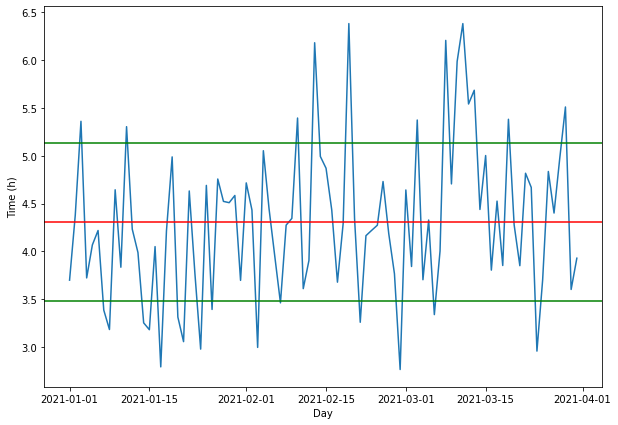

In [184]:
b = time_kitchen.plot(x = "Date", y = "Time spent_float", legend = False, figsize = (10,7))
b.axhline(time_kitchen_mean_float, color = "red")
b.axhline(time_kitchen_mean_plus, color = 'green')
b.axhline(time_kitchen_mean_minus, color = 'green')
b.set_ylabel("Time (h)")
b.set_xlabel('Day')